In [1]:
#import appropriate packages

import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
start = time.time()
import numpy
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

# ETL

# Dataset 1 - COLET

In [2]:
#obtain wd - note all folders/files will need to be in here 

path = os.getcwd()
files = os.listdir()
files

['.ipynb_checkpoints',
 '2.csv',
 '3.csv',
 'A2 Updated Copy.ipynb',
 'A2_220477645_2022.ipynb',
 'A2_WIP.ipynb',
 'Archive',
 'C0102100',
 'Colet',
 'Data temp',
 'data.mat',
 'DBSCAN.ipynb',
 'EnsembleLearning.ipynb',
 'important.txt',
 'keras_ensemblng-master',
 'keras_ensemblng-master.zip',
 'logs',
 'Log_ROC.png',
 'Other',
 'resultsZAB_SR.mat',
 'samples',
 'SIT720_A2_220477645_2022.ipynb',
 'SIT720_A3-Copy1.ipynb',
 'SIT720_A3_220477645.ipynb',
 'SIT720_A3_TEST.ipynb',
 'SIT720_A4.ipynb',
 'SIT720_A4v2.ipynb',
 'SIT720_A4v3.ipynb',
 'SIT723v1.ipynb',
 'StackedModel.ipynb',
 'StackedModel2.ipynb',
 'StackedModelWilliam.ipynb',
 'Task1_Subject_1.xlsx',
 'Task1_Subject_11.xlsx',
 'Task1_Subject_12.xlsx',
 'Task1_Subject_2.xlsx',
 'Untitled.ipynb',
 'Untitled4.ipynb',
 'Untitled5.ipynb']

In [3]:
#extract all excel files 

#IMPORTANT - MAKE SURE THE COLUMN HEADERS IN THE FIRST FILE ARE ALL THERE OTHERWISE THERE WILL BE ISSUES LATER ON!

files_xlsx = [f for f in files if f[-4:] == 'xlsx']
files_xlsx

['Task1_Subject_1.xlsx',
 'Task1_Subject_11.xlsx',
 'Task1_Subject_12.xlsx',
 'Task1_Subject_2.xlsx']

In [4]:
#blank dataframe to write to 
#we need one of these for each record type (i.e. 16) otherwise we are appending to differing columns
c_gaze_task1 = pd.DataFrame()
c_gaze_task2 = pd.DataFrame()
c_gaze_task3 = pd.DataFrame()
c_gaze_task4 = pd.DataFrame()
c_pupil_task1 = pd.DataFrame()
c_pupil_task2 = pd.DataFrame()
c_pupil_task3 = pd.DataFrame()
c_pupil_task4 = pd.DataFrame()
c_blinks_task1 = pd.DataFrame()
c_blinks_task2 = pd.DataFrame()
c_blinks_task3 = pd.DataFrame()
c_blinks_task4 = pd.DataFrame()
c_annotation_task1 = pd.DataFrame()
c_annotation_task2 = pd.DataFrame()
c_annotation_task3 = pd.DataFrame()
c_annotation_task4 = pd.DataFrame()

In [5]:
#loop through files - use read_excel - note sheet name 

#c stands for COLET

for f in files_xlsx:
    #data = pd.read_excel(f)
    data1 = pd.read_excel(f, sheet_name = 0)
    data1['file'] = f
    c_gaze_task1 = c_gaze_task1.append(data1)

In [6]:
c_gaze_task1 

,gaze_timestamp,world_index,confidence,norm_pos_x,norm_pos_y,base_data,gaze_point_3d_x,gaze_point_3d_y,gaze_point_3d_z,eye_center0_3d_x,...,gaze_normal0_x,gaze_normal0_y,gaze_normal0_z,eye_center1_3d_x,eye_center1_3d_y,eye_center1_3d_z,gaze_normal1_x,gaze_normal1_y,gaze_normal1_z,file
0,5410.551715,0,0.999499,0.446264,0.846886,'5410.549631999999-0 5410.553797-1',-6.720630,-31.252881,80.700682,20.004033,...,-0.235298,-0.420213,0.876388,-39.195621,15.099793,-21.600300,0.277597,-0.391313,0.877391,Task1_Subject_1.xlsx
1,5410.555834,0,0.999653,0.446534,0.847007,'5410.557871999999-0 5410.553797-1',-6.690706,-31.298388,80.793260,20.004033,...,-0.234840,-0.420298,0.876470,-39.195621,15.099793,-21.600300,0.277597,-0.391313,0.877391,Task1_Subject_1.xlsx
2,5410.559774,0,0.999648,0.446660,0.846410,'5410.557871999999-0 5410.561675-1',-6.664575,-31.211650,80.708374,20.004033,...,-0.234840,-0.420298,0.876470,-39.195621,15.099793,-21.600300,0.278049,-0.390575,0.877576,Task1_Subject_1.xlsx
3,5410.563583,0,0.999656,0.446442,0.845542,'5410.565490999999-0 5410.561675-1',-6.689463,-31.118351,80.664979,20.004033,...,-0.235225,-0.419217,0.876885,-39.195621,15.099793,-21.600300,0.278049,-0.390575,0.877576,Task1_Subject_1.xlsx
4,5410.568291,0,0.999565,0.446472,0.845614,'5410.565490999999-0 5410.571091999999-1',-6.683464,-31.115105,80.640260,20.004033,...,-0.235225,-0.419217,0.876885,-39.195621,15.099793,-21.600300,0.278153,-0.390681,0.877496,Task1_Subject_1.xlsx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10158,91504.131197,246,0.997961,0.477201,0.591276,'91504.129089-0 91504.133304-1',-6.068537,-28.215581,215.412728,17.159118,...,-0.096014,-0.157907,0.982775,-40.243035,12.929092,-20.519087,0.141100,-0.179112,0.973658,Task1_Subject_2.xlsx
10159,91504.135168,247,0.997656,0.477623,0.591320,'91504.137032-0 91504.133304-1',-5.944534,-28.336224,216.270013,17.159118,...,-0.095163,-0.157704,0.982890,-40.243035,12.929092,-20.519087,0.141100,-0.179112,0.973658,Task1_Subject_2.xlsx
10160,91504.140364,247,0.997473,0.477648,0.591853,'91504.137032-0 91504.143695-1',-5.931099,-28.419844,216.091490,17.159118,...,-0.095163,-0.157704,0.982890,-40.243035,12.929092,-20.519087,0.141239,-0.180023,0.973470,Task1_Subject_2.xlsx
10161,91504.144349,247,0.998763,0.476492,0.590544,'91504.145004-0 91504.143695-1',-6.268251,-27.856221,213.773034,17.159118,...,-0.097485,-0.156341,0.982880,-40.243035,12.929092,-20.519087,0.141239,-0.180023,0.973470,Task1_Subject_2.xlsx


In [7]:
#loop through files - use read_excel - note sheet name 

for f in files_xlsx:
    #data = pd.read_excel(f)
    data2 = pd.read_excel(f, sheet_name = 1)
    data2['file'] = f
    c_gaze_task2 = c_gaze_task2.append(data2)
   

In [8]:
c_gaze_task2

,gaze_timestamp,world_index,confidence,norm_pos_x,norm_pos_y,base_data,gaze_point_3d_x,gaze_point_3d_y,gaze_point_3d_z,eye_center0_3d_x,...,gaze_normal0_x,gaze_normal0_y,gaze_normal0_z,eye_center1_3d_x,eye_center1_3d_y,eye_center1_3d_z,gaze_normal1_x,gaze_normal1_y,gaze_normal1_z,file
0,4659.168013,0,0.999946,0.467168,0.841347,'4659.1660919999995-0 4659.169934-1',-3.465714,-28.025541,73.689623,19.490548,...,-0.216004,-0.404146,0.888824,-38.378552,14.746163,-23.063852,0.313394,-0.383356,0.868805,Task1_Subject_1.xlsx
1,4659.171724,0,0.999934,0.467982,0.841412,'4659.173514-0 4659.169934-1',-3.374369,-28.127372,73.947970,19.490548,...,-0.214639,-0.404058,0.889194,-38.378552,14.746163,-23.063852,0.313394,-0.383356,0.868805,Task1_Subject_1.xlsx
2,4659.175874,0,0.999912,0.467992,0.841952,'4659.173514-0 4659.178234999999-1',-3.372870,-28.163546,73.927925,19.490548,...,-0.214639,-0.404058,0.889194,-38.378552,14.746163,-23.063852,0.313423,-0.384043,0.868491,Task1_Subject_1.xlsx
3,4659.179746,0,0.999956,0.467042,0.841566,'4659.181258-0 4659.178234999999-1',-3.479495,-28.023615,73.637258,19.490548,...,-0.216234,-0.403766,0.888941,-38.378552,14.746163,-23.063852,0.313423,-0.384043,0.868491,Task1_Subject_1.xlsx
4,4659.183226,0,0.999976,0.467126,0.841238,'4659.181258-0 4659.185194-1',-3.466174,-27.978763,73.589596,19.490548,...,-0.216234,-0.403766,0.888941,-38.378552,14.746163,-23.063852,0.313692,-0.383646,0.868569,Task1_Subject_1.xlsx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7114,91294.286808,115,0.998842,0.454891,0.536075,'91294.28458-0 91294.289037-1',-11.330914,-14.156830,176.487345,19.530167,...,-0.153840,-0.155301,0.975815,-39.614250,12.749184,-21.421734,0.139884,-0.116285,0.983316,Task1_Subject_2.xlsx
7115,91294.290832,116,0.998571,0.454397,0.536073,'91294.292627-0 91294.289037-1',-11.427794,-14.101945,175.798596,19.530167,...,-0.154836,-0.155676,0.975598,-39.614250,12.749184,-21.421734,0.139884,-0.116285,0.983316,Task1_Subject_2.xlsx
7116,91294.294669,116,0.998362,0.454419,0.535588,'91294.292627-0 91294.296711-1',-11.416829,-14.018194,175.730352,19.530167,...,-0.154836,-0.155676,0.975598,-39.614250,12.749184,-21.421734,0.139985,-0.115553,0.983388,Task1_Subject_2.xlsx
7117,91294.298808,116,0.998666,0.454151,0.534848,'91294.300904-0 91294.296711-1',-11.470273,-13.871944,175.384410,19.530167,...,-0.155388,-0.154701,0.975665,-39.614250,12.749184,-21.421734,0.139985,-0.115553,0.983388,Task1_Subject_2.xlsx


In [9]:
#loop through files - use read_excel - note sheet name 

for f in files_xlsx:
    #data = pd.read_excel(f)
    data3 = pd.read_excel(f, sheet_name = 2)
    data3['file'] = f
    c_gaze_task3 = c_gaze_task3.append(data3)
   

In [10]:
c_gaze_task3

,gaze_timestamp,world_index,confidence,norm_pos_x,norm_pos_y,base_data,gaze_point_3d_x,gaze_point_3d_y,gaze_point_3d_z,eye_center0_3d_x,...,gaze_normal0_x,gaze_normal0_y,gaze_normal0_z,eye_center1_3d_x,eye_center1_3d_y,eye_center1_3d_z,gaze_normal1_x,gaze_normal1_y,gaze_normal1_z,file
0,4925.733554,0,0.999807,0.455139,0.829161,'4925.733566-0 4925.733541-1',-5.210845,-28.369822,77.211448,21.275608,...,-0.245195,-0.411069,0.878010,-39.742654,14.772697,-20.876477,0.306528,-0.377348,0.873870,Task1_Subject_1.xlsx
1,4925.737495,0,0.999896,0.455489,0.827894,'4925.733566-0 4925.741424-1',-5.148993,-28.190206,77.013647,21.275608,...,-0.245195,-0.411069,0.878010,-39.742654,14.772697,-20.876477,0.307662,-0.375822,0.874130,Task1_Subject_1.xlsx
2,4925.741473,0,0.999911,0.455146,0.828076,'4925.741521999999-0 4925.741424-1',-5.186693,-28.163240,76.895547,21.275608,...,-0.245780,-0.411400,0.877691,-39.742654,14.772697,-20.876477,0.307662,-0.375822,0.874130,Task1_Subject_1.xlsx
3,4925.745420,0,0.999885,0.454981,0.828821,'4925.741521999999-0 4925.749317999999-1',-5.215824,-28.258688,76.985009,21.275608,...,-0.245780,-0.411400,0.877691,-39.742654,14.772697,-20.876477,0.307127,-0.376733,0.873925,Task1_Subject_1.xlsx
4,4925.749386,0,0.999868,0.454758,0.828875,'4925.749452999999-0 4925.749317999999-1',-5.240436,-28.236476,76.910377,21.275608,...,-0.246163,-0.411530,0.877523,-39.742654,14.772697,-20.876477,0.307127,-0.376733,0.873925,Task1_Subject_1.xlsx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10220,91712.260311,154,0.999156,0.790330,1.066367,'91712.260311-0',168.563821,-198.498606,247.787340,-170.372456,...,0.677873,-0.378105,0.630496,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_2.xlsx
10221,91712.260522,154,0.326777,0.653041,1.027447,'91712.260522-1',101.360287,-208.689349,327.384560,NaN,...,NaN,NaN,NaN,-21.229198,-4.656577,-112.322668,0.245179,-0.408066,0.879414,Task1_Subject_2.xlsx
10222,91712.270061,155,0.249865,0.655062,1.032875,'91712.270061-1',102.720288,-210.784703,326.023908,NaN,...,NaN,NaN,NaN,-21.229198,-4.656577,-112.322668,0.247899,-0.412256,0.876693,Task1_Subject_2.xlsx
10223,91712.274756,155,0.327810,0.656051,1.035546,'91712.274756-1',103.387259,-211.818006,325.347163,NaN,...,NaN,NaN,NaN,-21.229198,-4.656577,-112.322668,0.249233,-0.414323,0.875340,Task1_Subject_2.xlsx


In [11]:
#loop through files - use read_excel - note sheet name 

for f in files_xlsx:
    #data = pd.read_excel(f)
    data4 = pd.read_excel(f, sheet_name = 3)
    data4['file'] = f
    c_gaze_task4 = c_gaze_task4.append(data4)
   

In [12]:
c_gaze_task4 

,gaze_timestamp,world_index,confidence,norm_pos_x,norm_pos_y,base_data,gaze_point_3d_x,gaze_point_3d_y,gaze_point_3d_z,eye_center0_3d_x,...,gaze_normal0_x,gaze_normal0_y,gaze_normal0_z,eye_center1_3d_x,eye_center1_3d_y,eye_center1_3d_z,gaze_normal1_x,gaze_normal1_y,gaze_normal1_z,file
0,5186.936018,0,0.999910,0.429778,0.894138,'5186.937763-0 5186.934273-1',-7.849854,-30.436482,68.829957,18.763117,...,-0.255538,-0.444614,0.858498,-37.711558,15.192075,-24.476072,0.276384,-0.423655,0.862629,Task1_Subject_1.xlsx
1,5186.939908,0,0.999884,0.429607,0.893521,'5186.937763-0 5186.942054-1',-7.883667,-30.444688,68.959266,18.763117,...,-0.255538,-0.444614,0.858498,-37.711558,15.192075,-24.476072,0.275779,-0.422871,0.863207,Task1_Subject_1.xlsx
2,5186.944288,0,0.999771,0.429758,0.893629,'5186.946523-0 5186.942054-1',-7.869988,-30.470123,68.998894,18.763117,...,-0.255302,-0.444724,0.858511,-37.711558,15.192075,-24.476072,0.275779,-0.422871,0.863207,Task1_Subject_1.xlsx
3,5186.947952,0,0.999775,0.429542,0.893677,'5186.946523-0 5186.949380999999-1',-7.913816,-30.541058,69.147955,18.763117,...,-0.255302,-0.444724,0.858511,-37.711558,15.192075,-24.476072,0.274999,-0.422905,0.863439,Task1_Subject_1.xlsx
4,5186.951829,0,0.999893,0.430029,0.894655,'5186.954277-0 5186.949380999999-1',-7.868716,-30.663442,69.251569,18.763117,...,-0.254523,-0.445863,0.858152,-37.711558,15.192075,-24.476072,0.274999,-0.422905,0.863439,Task1_Subject_1.xlsx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11952,91044.130570,296,0.998380,0.461782,0.545401,'91044.12863-0 91044.13251-1',-12.188800,-20.385961,229.770605,21.195309,...,-0.132431,-0.144970,0.980533,-39.446593,12.972918,-20.997805,0.106908,-0.123998,0.986506,Task1_Subject_2.xlsx
11953,91044.134602,297,0.998220,0.463176,0.544795,'91044.13669300001-0 91044.13251-1',-11.837936,-20.550696,233.115910,21.195309,...,-0.129392,-0.142787,0.981259,-39.446593,12.972918,-20.997805,0.106908,-0.123998,0.986506,Task1_Subject_2.xlsx
11954,91044.138671,297,0.997544,0.463771,0.544406,'91044.13669300001-0 91044.14065-1',-11.476683,-20.226715,230.383378,21.195309,...,-0.129392,-0.142787,0.981259,-39.446593,12.972918,-20.997805,0.109463,-0.124323,0.986185,Task1_Subject_2.xlsx
11955,91044.142631,297,0.997553,0.468171,0.545720,'91044.144611-0 91044.14065-1',-10.291483,-21.453108,241.113589,21.195309,...,-0.119692,-0.141243,0.982713,-39.446593,12.972918,-20.997805,0.109463,-0.124323,0.986185,Task1_Subject_2.xlsx


In [13]:
#loop through files - use read_excel - note sheet name 

for f in files_xlsx:
    #data = pd.read_excel(f)
    data5 = pd.read_excel(f, sheet_name = 4)
    data5['file'] = f
    c_pupil_task1 = c_pupil_task1.append(data5)
   

In [14]:
c_pupil_task1

,pupil_timestamp,world_index,eye_id,confidence,norm_pos_x,norm_pos_y,diameter,method,ellipse_center_x,ellipse_center_y,...,circle_3d_normal_z,circle_3d_radius,theta,phi,projected_sphere_center_x,projected_sphere_center_y,projected_sphere_axis_a,projected_sphere_axis_b,projected_sphere_angle,file
0,5410.553797,0,1,1.000000,0.406205,0.708513,40.757561,'2d c++',77.991356,55.965595,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_1.xlsx
1,5410.553797,0,1,0.999646,0.406235,0.708578,40.764095,'3d c++',77.997212,55.953014,...,-0.714380,1.971798,1.419294,-2.333954,145.942173,79.574077,187.867489,187.867489,90.0,Task1_Subject_1.xlsx
2,5410.557872,0,0,0.999661,0.326001,0.395972,38.729047,'3d c++',62.592283,115.973389,...,-0.699703,1.889488,1.768446,-2.346975,134.652012,92.929580,188.411042,188.411042,90.0,Task1_Subject_1.xlsx
3,5410.557872,0,0,1.000000,0.325980,0.396084,38.723305,'2d c++',62.588215,115.951805,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_1.xlsx
4,5410.561675,0,1,1.000000,0.406046,0.707954,40.842903,'2d c++',77.960808,56.072765,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_1.xlsx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20325,91504.143695,247,1,0.998728,0.394337,0.791093,31.661727,'3d c++',75.712616,40.110084,...,-0.844422,1.746387,1.395058,-2.110947,121.668866,67.894540,163.097958,163.097958,90.0,Task1_Subject_2.xlsx
20326,91504.145004,247,0,1.000000,0.174864,0.391404,30.574167,'2d c++',33.573971,116.850464,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_2.xlsx
20327,91504.145004,247,0,0.998798,0.174865,0.391466,30.572247,'3d c++',33.574030,116.838482,...,-0.765574,1.778297,1.786555,-2.240918,95.850136,95.122724,161.250817,161.250817,90.0,Task1_Subject_2.xlsx
20328,91504.149086,247,1,0.998703,0.394456,0.790069,31.753109,'3d c++',75.735642,40.306804,...,-0.844960,1.751092,1.397025,-2.110463,121.668866,67.894540,163.097958,163.097958,90.0,Task1_Subject_2.xlsx


In [15]:
#loop through files - use read_excel - note sheet name 

for f in files_xlsx:
    #data = pd.read_excel(f)
    data6 = pd.read_excel(f, sheet_name = 5)
    data6['file'] = f
    c_pupil_task2 = c_pupil_task2.append(data6)
   

In [16]:
c_pupil_task2

,pupil_timestamp,world_index,eye_id,confidence,norm_pos_x,norm_pos_y,diameter,method,ellipse_center_x,ellipse_center_y,...,circle_3d_normal_z,circle_3d_radius,theta,phi,projected_sphere_center_x,projected_sphere_center_y,projected_sphere_axis_a,projected_sphere_axis_b,projected_sphere_angle,file
0,4659.169934,0,1,1.000000,0.383349,0.709518,39.585670,'2d c++',73.602982,55.772636,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_1.xlsx
1,4659.169934,0,1,0.999989,0.383349,0.709497,39.582783,'3d c++',73.602915,55.776529,...,-0.691045,2.047310,1.432883,-2.369453,141.816092,76.930217,179.758212,179.758212,90.0,Task1_Subject_1.xlsx
2,4659.173514,0,0,1.000000,0.348162,0.349042,37.972534,'2d c++',66.847015,124.983849,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_1.xlsx
3,4659.173514,0,0,0.999880,0.348163,0.349008,37.976604,'3d c++',66.847372,124.990553,...,-0.718888,1.948367,1.753716,-2.321682,133.439111,102.086138,179.930302,179.930302,90.0,Task1_Subject_1.xlsx
4,4659.178235,0,1,0.999944,0.383273,0.709904,39.386227,'3d c++',73.588462,55.698340,...,-0.690810,2.037330,1.432163,-2.369687,141.816092,76.930217,179.758212,179.758212,90.0,Task1_Subject_1.xlsx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14237,91294.292627,116,0,1.000000,0.170877,0.420998,34.161545,'2d c++',32.808372,111.168396,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_2.xlsx
14238,91294.296711,116,1,1.000000,0.387852,0.752582,34.120609,'2d c++',74.467667,47.504215,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_2.xlsx
14239,91294.296711,116,1,0.998748,0.387751,0.752529,34.100656,'3d c++',74.448204,47.514417,...,-0.857578,1.937847,1.459500,-2.100579,119.243609,67.973907,158.987435,158.987435,90.0,Task1_Subject_2.xlsx
14240,91294.300904,116,0,1.000000,0.170688,0.421657,34.403297,'2d c++',32.772079,111.041946,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_2.xlsx


In [17]:
#loop through files - use read_excel - note sheet name 

for f in files_xlsx:
    #data = pd.read_excel(f)
    data7 = pd.read_excel(f, sheet_name = 6)
    data7['file'] = f
    c_pupil_task3 = c_pupil_task3.append(data7)
   

In [18]:
c_pupil_task3

,pupil_timestamp,world_index,eye_id,confidence,norm_pos_x,norm_pos_y,diameter,method,ellipse_center_x,ellipse_center_y,...,circle_3d_normal_z,circle_3d_radius,theta,phi,projected_sphere_center_x,projected_sphere_center_y,projected_sphere_axis_a,projected_sphere_axis_b,projected_sphere_angle,file
0,4925.733541,0,1,0.999716,0.396698,0.717863,39.984980,'3d c++',76.166063,54.170372,...,-0.697941,1.882471,1.438231,-2.360411,148.217415,76.821010,192.722410,192.722410,90.0,Task1_Subject_1.xlsx
1,4925.733541,0,1,1.000000,0.396681,0.717742,39.968163,'2d c++',76.162796,54.193523,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_1.xlsx
2,4925.733566,0,0,1.000000,0.336370,0.370211,38.975426,'2d c++',64.582977,120.919556,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_1.xlsx
3,4925.733566,0,0,0.999898,0.336366,0.370172,38.979005,'3d c++',64.582350,120.927035,...,-0.695439,1.788076,1.757177,-2.355361,140.381627,96.652712,197.635498,197.635498,90.0,Task1_Subject_1.xlsx
4,4925.741424,0,1,0.999894,0.396292,0.716681,40.184041,'3d c++',76.088124,54.397321,...,-0.697569,1.892244,1.439996,-2.361170,148.217415,76.821010,192.722410,192.722410,90.0,Task1_Subject_1.xlsx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20455,91712.274756,155,1,0.327810,0.280526,0.907788,29.588620,'3d c++',53.860983,17.704627,...,-0.511851,1.723440,1.096538,-2.528558,122.883600,69.175588,172.163051,172.163051,90.0,Task1_Subject_2.xlsx
20456,91712.278590,155,0,1.000000,0.440344,0.167857,35.331074,'2d c++',84.546021,159.771469,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_2.xlsx
20457,91712.278590,155,0,0.999257,0.440501,0.167803,35.341516,'3d c++',84.576276,159.781887,...,-0.755452,1.795260,2.235737,-1.854696,106.964557,89.461828,179.463703,179.463703,90.0,Task1_Subject_2.xlsx
20458,91712.281050,155,1,0.343013,0.280430,0.908580,29.674796,'3d c++',53.842581,17.552719,...,-0.508921,1.730258,1.093959,-2.531653,122.883600,69.175588,172.163051,172.163051,90.0,Task1_Subject_2.xlsx


In [19]:
#loop through files - use read_excel - note sheet name 

for f in files_xlsx:
    #data = pd.read_excel(f)
    data8 = pd.read_excel(f, sheet_name = 7)
    data8['file'] = f
    c_pupil_task4 = c_pupil_task4.append(data8)
   

In [20]:
c_pupil_task4

,pupil_timestamp,world_index,eye_id,confidence,norm_pos_x,norm_pos_y,diameter,method,ellipse_center_x,ellipse_center_y,...,circle_3d_normal_z,circle_3d_radius,theta,phi,projected_sphere_center_x,projected_sphere_center_y,projected_sphere_axis_a,projected_sphere_axis_b,projected_sphere_angle,file
0,5186.934273,0,1,0.999998,0.406175,0.712463,41.279886,'3d c++',77.985519,55.207111,...,-0.704411,2.239127,1.384710,-2.342411,140.421651,79.844078,172.482422,172.482422,90.0,Task1_Subject_1.xlsx
1,5186.934273,0,1,1.000000,0.406178,0.712473,41.281082,'2d c++',77.986107,55.205215,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_1.xlsx
2,5186.937763,0,0,1.000000,0.310229,0.395438,39.079651,'2d c++',59.563965,116.075829,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_1.xlsx
3,5186.937763,0,0,0.999822,0.310204,0.395425,39.081583,'3d c++',59.559194,116.078464,...,-0.676369,2.057287,1.792133,-2.375560,129.829297,92.260623,178.962427,178.962427,90.0,Task1_Subject_1.xlsx
4,5186.942054,0,1,0.999945,0.406465,0.712099,41.363808,'3d c++',78.041339,55.277064,...,-0.705116,2.243082,1.385460,-2.341527,140.421651,79.844078,172.482422,172.482422,90.0,Task1_Subject_1.xlsx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20455,91712.274756,155,1,0.327810,0.280526,0.907788,29.588620,'3d c++',53.860983,17.704627,...,-0.511851,1.723440,1.096538,-2.528558,122.883600,69.175588,172.163051,172.163051,90.0,Task1_Subject_2.xlsx
20456,91712.278590,155,0,1.000000,0.440344,0.167857,35.331074,'2d c++',84.546021,159.771469,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task1_Subject_2.xlsx
20457,91712.278590,155,0,0.999257,0.440501,0.167803,35.341516,'3d c++',84.576276,159.781887,...,-0.755452,1.795260,2.235737,-1.854696,106.964557,89.461828,179.463703,179.463703,90.0,Task1_Subject_2.xlsx
20458,91712.281050,155,1,0.343013,0.280430,0.908580,29.674796,'3d c++',53.842581,17.552719,...,-0.508921,1.730258,1.093959,-2.531653,122.883600,69.175588,172.163051,172.163051,90.0,Task1_Subject_2.xlsx


In [21]:
#loop through files - use read_excel - note sheet name 

for f in files_xlsx:
    #data = pd.read_excel(f)
    data9 = pd.read_excel(f, sheet_name = 8)
    data9['file'] = f
    c_blinks_task1 = c_blinks_task1.append(data9)
   

In [22]:
c_blinks_task1 

,ID,start_timestamp,duration,end_timestamp,start_frame_index,index,end_frame_index,confidence,filter_response,base_Data,file
0,1,5437.625617,0.236131,5437.861748,37,40,44,0.703872,'0.5068225043614704 0.5512669488059149 0.59571...,'5437.625617 5437.629564 5437.633621 5437.6378...,Task1_Subject_1.xlsx
1,2,5444.161561,0.180073,5444.341634,231,233,236,0.553669,'0.5048782729116744 0.5493227173561188 0.59287...,'5444.161561 5444.165642 5444.169793 5444.1755...,Task1_Subject_1.xlsx
0,1,8419.904790,0.203903,8420.108693,16,19,22,0.671161,'0.5366363953239319 0.5810808397683763 0.62552...,'8419.90479 8419.908641 8419.912594000001 8419...,Task1_Subject_11.xlsx
1,2,8422.874139,0.166438,8423.040577,105,107,110,0.541905,'0.5358719345469952 0.5803163789914397 0.62476...,'8422.874139000001 8422.877731 8422.8813280000...,Task1_Subject_11.xlsx
2,3,8425.136670,0.139934,8425.276604,173,175,177,0.390417,'0.5113752267709317 0.5275677267391169 0.52801...,'8425.13667 8425.140687000001 8425.145514 8425...,Task1_Subject_11.xlsx
3,4,8428.502178,0.202397,8428.704575,273,276,279,0.602644,'0.5051384221324281 0.5495828665768726 0.59402...,'8428.502178 8428.504634 8428.508712 8428.5127...,Task1_Subject_11.xlsx
4,5,8432.040730,0.166110,8432.206840,379,381,383,0.582601,'0.5433065435100408 0.5908193238055187 0.63754...,'8432.04073 8432.044858000001 8432.048708 8432...,Task1_Subject_11.xlsx
5,1,8434.644753,0.176084,8434.820837,67,69,72,0.514138,'0.5004845591598159 0.5245662073201822 0.56901...,'8434.644753 8434.65463 8434.654631000001 8434...,Task1_Subject_11.xlsx
6,2,8442.236527,0.160343,8442.396870,294,296,299,0.471423,'0.5002787885552522 0.5447232329996968 0.55988...,'8442.236527000001 8442.244541 8442.2445440000...,Task1_Subject_11.xlsx
7,3,8448.368571,0.188070,8448.556641,477,479,482,0.612143,'0.526192115412818 0.5706365598572625 0.615081...,'8448.368571 8448.373085000001 8448.376591 844...,Task1_Subject_11.xlsx


In [23]:
#loop through files - use read_excel - note sheet name 

for f in files_xlsx:
    #data = pd.read_excel(f)
    data10 = pd.read_excel(f, sheet_name = 9)
    data10['file'] = f
    c_blinks_task2 = c_blinks_task2.append(data10)
   

In [24]:
c_blinks_task2

,ID,start_timestamp,duration,end_timestamp,start_frame_index,index,end_frame_index,confidence,filter_response,base_Data,file


In [25]:
#loop through files - use read_excel - note sheet name 

for f in files_xlsx:
    #data = pd.read_excel(f)
    data11 = pd.read_excel(f, sheet_name = 10)
    data11['file'] = f
    c_blinks_task3 = c_blinks_task3.append(data11)
   

In [26]:
c_blinks_task3

,ID,start_timestamp,duration,end_timestamp,start_frame_index,index,end_frame_index,confidence,filter_response,base_Data,file
0,1,4937.633752,0.219501,4937.853253,355,358,362,0.632858,'0.5145911521303596 0.559035596574804 0.603480...,'4937.633752 4937.637365 4937.642261 4937.6454...,Task1_Subject_1.xlsx
1,2,4938.933606,0.179660,4939.113266,394,396,399,0.594492,'0.5276674487690183 0.5721118932134627 0.61655...,'4938.933606 4938.9373909999995 4938.943244999...,Task1_Subject_1.xlsx
2,3,4942.313627,0.219615,4942.533242,495,498,501,0.643151,'0.5229700933989672 0.5674145378434114 0.61185...,'4942.3136269999995 4942.317322 4942.321507 49...,Task1_Subject_1.xlsx
3,1,4948.394007,0.575348,4948.969355,2,10,19,0.334890,'0.5038569896286232 0.5483014340730676 0.59274...,'4948.394007 4948.397762 4948.4018829999995 49...,Task1_Subject_1.xlsx
4,2,4949.149379,0.175898,4949.325277,25,27,30,0.562926,'0.5131920799712788 0.5576365244157233 0.60208...,'4949.1493789999995 4949.1532959999995 4949.15...,Task1_Subject_1.xlsx
...,...,...,...,...,...,...,...,...,...,...,...
1,2,91672.954616,1.122357,91674.076973,81,97,114,0.138807,'0.5104950745900471 0.4216061857011582 0.47422...,'91672.954616 91672.956893 91672.961584 91672....,Task1_Subject_2.xlsx
2,1,91679.100042,2.016821,91681.116863,0,29,59,0.122048,'0.5126194083608475 0.5313610685879995 0.57580...,'91679.100042 91679.100784 91679.107756 91679....,Task1_Subject_2.xlsx
3,1,91690.944870,0.216013,91691.160883,5,8,11,0.529105,'0.517606176217397 0.5620506206618414 0.606495...,'91690.94487 91690.949067 91690.952855 91690.9...,Task1_Subject_2.xlsx
4,2,91691.624877,0.735907,91692.360784,25,36,47,0.213149,'0.5031753874915919 0.4587309430471473 0.54761...,'91691.624877 91691.6294 91691.633338 91691.63...,Task1_Subject_2.xlsx


In [27]:
#loop through files - use read_excel - note sheet name 

for f in files_xlsx:
    #data = pd.read_excel(f)
    data12 = pd.read_excel(f, sheet_name = 11)
    data12['file'] = f
    c_blinks_task4 = c_blinks_task4.append(data12)
   

In [28]:
c_blinks_task4

,ID,start_timestamp,duration,end_timestamp,start_frame_index,index,end_frame_index,confidence,filter_response,base_Data,file
0,1,5200.489894,0.628398,5201.118292,122,131,141,0.390568,'0.5071523680042445 0.551596812448689 0.596041...,'5200.489893999999 5200.493501 5200.497832 520...,Task1_Subject_1.xlsx
1,2,5201.585551,0.248134,5201.833685,155,158,162,0.624402,'0.5121954566591707 0.556639901103615 0.601084...,'5201.585551 5201.589585 5201.595933 5201.5976...,Task1_Subject_1.xlsx
0,1,8179.628970,0.172122,8179.801092,156,158,161,0.551453,'0.5191555857204391 0.5645235842674634 0.60822...,'8179.62897 8179.634311999999 8179.637236 8179...,Task1_Subject_11.xlsx
1,2,8180.157174,0.199729,8180.356903,172,175,178,0.613762,'0.5234297358938313 0.5321973796947573 0.57664...,'8180.157174 8180.161123999999 8180.165105 818...,Task1_Subject_11.xlsx
2,3,8183.037177,0.208865,8183.246042,258,261,264,0.652244,'0.5422413637491638 0.5866858081936083 0.63113...,'8183.037176999999 8183.041152 8183.0449599999...,Task1_Subject_11.xlsx
3,4,8183.829157,0.156066,8183.985223,282,284,286,0.481735,'0.5295246854814569 0.5739691299259013 0.61841...,'8183.829157 8183.8331 8183.836939 8183.841318...,Task1_Subject_11.xlsx
4,1,8186.749515,0.191521,8186.941036,67,69,72,0.569183,'0.5357250685401883 0.5801695129846327 0.62461...,'8186.7495149999995 8186.753083 8186.756912999...,Task1_Subject_11.xlsx
5,2,8192.801145,0.255737,8193.056882,247,251,255,0.696047,'0.5083149062262641 0.5527593506707085 0.59720...,'8192.801145000001 8192.805024000001 8192.8090...,Task1_Subject_11.xlsx
6,3,8199.849157,0.187968,8200.037125,458,460,463,0.513370,'0.5044547921067962 0.5493834567381101 0.59382...,'8199.849157 8199.853268 8199.857041000001 819...,Task1_Subject_11.xlsx
7,1,8209.340962,0.203869,8209.544831,266,269,272,0.611722,'0.5343049254982164 0.5787493699426608 0.62319...,'8209.340962 8209.340966 8209.348929 8209.3489...,Task1_Subject_11.xlsx


In [29]:
#loop through files - use read_excel - note sheet name 

for f in files_xlsx:
    #data = pd.read_excel(f)
    data13 = pd.read_excel(f, sheet_name = 12)
    data13['file'] = f
    c_annotation_task1 = c_annotation_task1.append(data13)
   

In [30]:
c_annotation_task1

,mental_1,physical_1,temporal_1,perforamnce_1,effort_1,frustation_1,mean_1,file
0,10,5,15,25,25,10,15.0,Task1_Subject_1.xlsx
0,50,10,15,10,50,5,23.3,Task1_Subject_11.xlsx
0,20,10,10,5,20,5,11.7,Task1_Subject_12.xlsx
0,20,10,20,10,20,15,15.8,Task1_Subject_2.xlsx


In [31]:
#loop through files - use read_excel - note sheet name 

for f in files_xlsx:
    #data = pd.read_excel(f)
    data14 = pd.read_excel(f, sheet_name = 13)
    data14['file'] = f
    c_annotation_task2 = c_annotation_task2.append(data14)
   

In [32]:
c_annotation_task2

,mental_1,physical_1,temporal_1,perforamnce_1,effort_1,frustation_1,mean_1,file
0,50,30,25,50,15,25,32.5,Task1_Subject_1.xlsx
0,50,25,45,15,35,5,29.2,Task1_Subject_11.xlsx
0,40,25,55,40,45,10,35.8,Task1_Subject_12.xlsx
0,50,10,60,30,30,25,34.2,Task1_Subject_2.xlsx


In [33]:
#loop through files - use read_excel - note sheet name 

for f in files_xlsx:
    #data = pd.read_excel(f)
    data15 = pd.read_excel(f, sheet_name = 14)
    data15['file'] = f
    c_annotation_task3 = c_annotation_task3.append(data15)
   

In [34]:
c_annotation_task3

,mental_1,physical_1,temporal_1,perforamnce_1,effort_1,frustation_1,mean_1,file
0,100,10,75,80,90,20,62.5,Task1_Subject_1.xlsx
0,90,15,85,35,85,75,64.2,Task1_Subject_11.xlsx
0,70,10,10,25,60,10,30.8,Task1_Subject_12.xlsx
0,50,10,20,25,50,20,29.2,Task1_Subject_2.xlsx


In [35]:
#loop through files - use read_excel - note sheet name 

for f in files_xlsx:
    #data = pd.read_excel(f)
    data16 = pd.read_excel(f, sheet_name = 15)
    data16['file'] = f
    c_annotation_task4 = c_annotation_task4.append(data16)
   

In [36]:
c_annotation_task4

,mental_1,physical_1,temporal_1,perforamnce_1,effort_1,frustation_1,mean_1,file
0,60,15,45,50,20,25,35.8,Task1_Subject_1.xlsx
0,85,10,95,40,90,70,65.0,Task1_Subject_11.xlsx
0,75,20,75,45,70,10,49.2,Task1_Subject_12.xlsx
0,85,10,90,90,80,85,73.3,Task1_Subject_2.xlsx


In [37]:
#not going to use the below - don't think subject info is important to analysis but leaving code in here in case I change my mind 

#for f in files_xlsx:
#    #data = pd.read_excel(f)
#    data = pd.read_excel(f, sheet_index = [16])
#    data['file'] = f
#    c_subjectinfo = df.append(data)
   

In [38]:
#check that the naming has worked
print(c_gaze_task1['file'].unique())

['Task1_Subject_1.xlsx' 'Task1_Subject_11.xlsx' 'Task1_Subject_12.xlsx'
 'Task1_Subject_2.xlsx']


In [39]:
#only interested in specific columns, so we will drop everything except those
#note that the 'file' column is the 'participant'

#Gaze data
c_gaze_task1 = c_gaze_task1.iloc[:, [0,6,7,8,21]]
c_gaze_task2 = c_gaze_task2.iloc[:, [0,6,7,8,21]]
c_gaze_task3 = c_gaze_task3.iloc[:, [0,6,7,8,21]]
c_gaze_task4 = c_gaze_task4.iloc[:, [0,6,7,8,21]]

#Pupil data
c_pupil_task1 = c_pupil_task1.iloc[:, [6,34]]
c_pupil_task2 = c_pupil_task2.iloc[:, [6,34]]
c_pupil_task3 = c_pupil_task3.iloc[:, [6,34]]
c_pupil_task4 = c_pupil_task4.iloc[:, [6,34]]

#Blink data - indx and file
c_blinks_task1 = c_blinks_task1.iloc[:, [5,10]]
c_blinks_task2 = c_blinks_task2.iloc[:, [5,10]]
c_blinks_task3 = c_blinks_task3.iloc[:, [5,10]]
c_blinks_task4 = c_blinks_task4.iloc[:, [5,10]]

#annotation data - mean and file
c_annotation_task1 = c_annotation_task1.iloc[:, [6,7]]
c_annotation_task2 = c_annotation_task2.iloc[:, [6,7]]
c_annotation_task3 = c_annotation_task3.iloc[:, [6,7]]
c_annotation_task4 = c_annotation_task4.iloc[:, [6,7]]

In [40]:
#get the difference between the previous value for each row

#Task 1
c_gaze_task1.sort_values(['file'], inplace=True)
c_gaze_task1['gaze_diff'] = c_gaze_task1.groupby('file')['gaze_timestamp'].diff()
c_gaze_task1['x_diff'] = c_gaze_task1.groupby('file')['gaze_point_3d_x'].diff()
c_gaze_task1['y_diff'] = c_gaze_task1.groupby('file')['gaze_point_3d_y'].diff()
c_gaze_task1['z_diff'] = c_gaze_task1.groupby('file')['gaze_point_3d_z'].diff()
c_gaze_task1['z_diff'] = c_gaze_task1.groupby('file')['gaze_point_3d_z'].diff()

#Task 2
c_gaze_task2.sort_values(['file'], inplace=True)
c_gaze_task2['gaze_diff'] = c_gaze_task2.groupby('file')['gaze_timestamp'].diff()
c_gaze_task2['x_diff'] = c_gaze_task2.groupby('file')['gaze_point_3d_x'].diff()
c_gaze_task2['y_diff'] = c_gaze_task2.groupby('file')['gaze_point_3d_y'].diff()
c_gaze_task2['z_diff'] = c_gaze_task2.groupby('file')['gaze_point_3d_z'].diff()
c_gaze_task2['z_diff'] = c_gaze_task2.groupby('file')['gaze_point_3d_z'].diff()

#Task 3
c_gaze_task3.sort_values(['file'], inplace=True)
c_gaze_task3['gaze_diff'] = c_gaze_task3.groupby('file')['gaze_timestamp'].diff()
c_gaze_task3['x_diff'] = c_gaze_task3.groupby('file')['gaze_point_3d_x'].diff()
c_gaze_task3['y_diff'] = c_gaze_task3.groupby('file')['gaze_point_3d_y'].diff()
c_gaze_task3['z_diff'] = c_gaze_task3.groupby('file')['gaze_point_3d_z'].diff()
c_gaze_task3['z_diff'] = c_gaze_task3.groupby('file')['gaze_point_3d_z'].diff()

#Task 4
c_gaze_task4.sort_values(['file'], inplace=True)
c_gaze_task4['gaze_diff'] = c_gaze_task4.groupby('file')['gaze_timestamp'].diff()
c_gaze_task4['x_diff'] = c_gaze_task4.groupby('file')['gaze_point_3d_x'].diff()
c_gaze_task4['y_diff'] = c_gaze_task4.groupby('file')['gaze_point_3d_y'].diff()
c_gaze_task4['z_diff'] = c_gaze_task4.groupby('file')['gaze_point_3d_z'].diff()
c_gaze_task4['z_diff'] = c_gaze_task4.groupby('file')['gaze_point_3d_z'].diff()

In [41]:
#square x, y and z

#Task 1
c_gaze_task1['x_diff^2'] = c_gaze_task1['x_diff']**2
c_gaze_task1['y_diff^2'] = c_gaze_task1['y_diff']**2
c_gaze_task1['z_diff^2'] = c_gaze_task1['z_diff']**2

#Task 2
c_gaze_task2['x_diff^2'] = c_gaze_task2['x_diff']**2
c_gaze_task2['y_diff^2'] = c_gaze_task2['y_diff']**2
c_gaze_task2['z_diff^2'] = c_gaze_task2['z_diff']**2

#Task 3
c_gaze_task3['x_diff^2'] = c_gaze_task3['x_diff']**2
c_gaze_task3['y_diff^2'] = c_gaze_task3['y_diff']**2
c_gaze_task3['z_diff^2'] = c_gaze_task3['z_diff']**2

#Task 4
c_gaze_task4['x_diff^2'] = c_gaze_task4['x_diff']**2
c_gaze_task4['y_diff^2'] = c_gaze_task4['y_diff']**2
c_gaze_task4['z_diff^2'] = c_gaze_task4['z_diff']**2

In [42]:
#sum x, y and z

column_names = ['x_diff^2','y_diff^2','z_diff^2']

#task 1
c_gaze_task1['sum']= c_gaze_task1[column_names].sum(axis=1)

#task 2
c_gaze_task2['sum']= c_gaze_task2[column_names].sum(axis=1)

#task 3
c_gaze_task3['sum']= c_gaze_task3[column_names].sum(axis=1)

#task 4
c_gaze_task4['sum']= c_gaze_task4[column_names].sum(axis=1)

In [43]:
#take sqrt of this value

#task 1
c_gaze_task1['sqrt']= np.sqrt(c_gaze_task1['sum'])

#task 2
c_gaze_task2['sqrt']= np.sqrt(c_gaze_task2['sum'])

#task 1
c_gaze_task3['sqrt']= np.sqrt(c_gaze_task3['sum'])

#task 1
c_gaze_task4['sqrt']= np.sqrt(c_gaze_task4['sum'])

In [44]:
#multiply by displacement to obtain velocity

#task 1
c_gaze_task1['velocity'] = c_gaze_task1['gaze_diff'] * c_gaze_task1['sqrt']

#task 2
c_gaze_task2['velocity'] = c_gaze_task2['gaze_diff'] * c_gaze_task2['sqrt']

#task 3
c_gaze_task3['velocity'] = c_gaze_task3['gaze_diff'] * c_gaze_task3['sqrt']

#task 4
c_gaze_task4['velocity'] = c_gaze_task4['gaze_diff'] * c_gaze_task4['sqrt']

In [45]:
#doing counts seems to actually update the dataframe - making copies to avoid this issue

c_gaze_task1sac = c_gaze_task1
c_gaze_task1fix = c_gaze_task1

c_gaze_task2sac = c_gaze_task2
c_gaze_task2fix = c_gaze_task2

c_gaze_task3sac = c_gaze_task2
c_gaze_task3fix = c_gaze_task2

c_gaze_task4sac = c_gaze_task2
c_gaze_task4fix = c_gaze_task2

In [46]:
#count of values above 55 (aka our fixations)

#get each of these into the dataframe and then join - i.e. one df is saccades, one is fixations, join on 'file'
#note - keeping the dataframe in the same format by using reset index
#renaming column to make life easier

#task 1
c_gaze_task1_fix = c_gaze_task1fix[c_gaze_task1fix['velocity'] > 0.55].groupby('file')['velocity'].count().reset_index()
c_gaze_task1_fix = c_gaze_task1_fix.rename(columns={'velocity': 'fixation_count'})
c_gaze_task1_fix['task']='1'
c_gaze_task1_sac = c_gaze_task1sac[c_gaze_task1sac['velocity'] < 0.55].groupby('file')['velocity'].count().reset_index()
c_gaze_task1_sac = c_gaze_task1_sac.rename(columns={'velocity': 'saccade_count'})
c_gaze_task1_sac['task']='1'

#task 2
c_gaze_task2_fix = c_gaze_task2fix[c_gaze_task2fix['velocity'] > 0.55].groupby('file')['velocity'].count().reset_index()
c_gaze_task2_fix = c_gaze_task2_fix.rename(columns={'velocity': 'fixation_count'})
c_gaze_task2_fix['task']='2'
c_gaze_task2_sac = c_gaze_task2sac[c_gaze_task2sac['velocity'] < 0.55].groupby('file')['velocity'].count().reset_index()
c_gaze_task2_sac = c_gaze_task2_sac.rename(columns={'velocity': 'saccade_count'})
c_gaze_task2_sac['task']='2'

#task 3
c_gaze_task3_fix = c_gaze_task3fix[c_gaze_task3fix['velocity'] > 0.55].groupby('file')['velocity'].count().reset_index()
c_gaze_task3_fix = c_gaze_task3_fix.rename(columns={'velocity': 'fixation_count'})
c_gaze_task3_fix['task']='3'
c_gaze_task3_sac = c_gaze_task3sac[c_gaze_task3sac['velocity'] < 0.55].groupby('file')['velocity'].count().reset_index()
c_gaze_task3_sac = c_gaze_task3_sac.rename(columns={'velocity': 'saccade_count'})
c_gaze_task3_sac['task']='3'

#task 4
c_gaze_task4_fix = c_gaze_task4fix[c_gaze_task4fix['velocity'] > 0.55].groupby('file')['velocity'].count().reset_index()
c_gaze_task4_fix = c_gaze_task4_fix.rename(columns={'velocity': 'fixation_count'})
c_gaze_task4_fix['task']='4'
c_gaze_task4_sac = c_gaze_task4sac[c_gaze_task4sac['velocity'] < 0.55].groupby('file')['velocity'].count().reset_index()
c_gaze_task4_sac = c_gaze_task4_sac.rename(columns={'velocity': 'saccade_count'})
c_gaze_task4_sac['task']='4'

In [47]:
#join saccades and fixations together 

#task 1
c_gaze_task1 = pd.concat([c_gaze_task1_fix.set_index('file'),c_gaze_task1_sac.set_index('file')], axis=1, join='inner')
c_gaze_task1['file'] = c_gaze_task1.index

#task 2
c_gaze_task2 = pd.concat([c_gaze_task2_fix.set_index('file'),c_gaze_task2_sac.set_index('file')], axis=1, join='inner')
c_gaze_task2['file'] = c_gaze_task2.index
#task 3
c_gaze_task3 = pd.concat([c_gaze_task3_fix.set_index('file'),c_gaze_task3_sac.set_index('file')], axis=1, join='inner')
c_gaze_task3['file'] = c_gaze_task3.index
#task 4
c_gaze_task4 = pd.concat([c_gaze_task4_fix.set_index('file'),c_gaze_task4_sac.set_index('file')], axis=1, join='inner')
c_gaze_task4['file'] = c_gaze_task4.index

In [48]:
a1 = c_gaze_task1
b1 = c_gaze_task2
c1 = c_gaze_task3
d1 = c_gaze_task4

In [49]:
a1 = a1.reset_index(drop = True)
b1 = b1.reset_index(drop = True)
c1 = c1.reset_index(drop = True)
d1 = d1.reset_index(drop = True)

In [50]:
a1 = a1.iloc[:,[0, 1, 2, 4]]
b1 = b1.iloc[:,[0, 1, 2, 4]]
c1 = c1.iloc[:,[0, 1, 2, 4]]
d1 = d1.iloc[:,[0, 1, 2, 4]]

In [51]:
#append all together
#gaze_final = pd.concat([c_gaze_task1, c_gaze_task2, c_gaze_task3, c_gaze_task4], ignore_index=True)

In [52]:
#reset the indexes as we are getting duplicates and unable to select with both index of file and column of file
#c_gaze_task1.reset_index(drop = True, inplace = True)
#c_gaze_task2.reset_index(drop = True, inplace = True)
#c_gaze_task3.reset_index(drop = True, inplace = True)
#c_gaze_task4.reset_index(drop = True, inplace = True)


In [53]:
test =  pd.concat([a1, b1], ignore_index=True, sort=False)
test1 = pd.concat([test, c1], ignore_index=True, sort=False)
test2 = pd.concat([test1, d1], ignore_index=True, sort=False)

In [54]:
#a = pd.merge(a1, b1, on=['file'])
#b = pd.merge(a, c_gaze_task3, on=['file'])
#c = pd.merge(b, c_gaze_task4, on=['file'])

In [55]:
#c

In [56]:
#c = c[['file','task,''fixation_count_x','saccade_count_x']]

In [57]:
gaze_final = test2
#df_new = df.iloc[:, [0,1,3]]

In [58]:
gaze_final

,fixation_count,task,saccade_count,file
0,215,1,7989,Task1_Subject_1.xlsx
1,498,1,13946,Task1_Subject_11.xlsx
2,290,1,9267,Task1_Subject_12.xlsx
3,399,1,9763,Task1_Subject_2.xlsx
4,194,2,6675,Task1_Subject_1.xlsx
5,315,2,6712,Task1_Subject_11.xlsx
6,256,2,5206,Task1_Subject_12.xlsx
7,321,2,6797,Task1_Subject_2.xlsx
8,194,3,6675,Task1_Subject_1.xlsx
9,315,3,6712,Task1_Subject_11.xlsx


In [59]:
# make a column with 1 or 0 for saccade

#may be able to drop this 

#task 1
#c_gaze_task1['saccade_flag'] = np.where(c_gaze_task1['velocity'] < 0.55, 1, 0)

#task 2
#c_gaze_task2['saccade_flag'] = np.where(c_gaze_task2['velocity'] < 0.55, 1, 0)

#task 3
#c_gaze_task3['saccade_flag'] = np.where(c_gaze_task3['velocity'] < 0.55, 1, 0)

#task 4
#c_gaze_task4['saccade_flag'] = np.where(c_gaze_task4['velocity'] < 0.55, 1, 0)

In [60]:
#fixation flag

#task 1
#c_gaze_task1['fixation_flag'] = np.where(c_gaze_task1['velocity'] > 0.55, 1, 0)

#task 2
#c_gaze_task1['fixation_flag'] = np.where(c_gaze_task1['velocity'] > 0.55, 1, 0)

#task 3
#c_gaze_task1['fixation_flag'] = np.where(c_gaze_task1['velocity'] > 0.55, 1, 0)

#task 4
#c_gaze_task1['fixation_flag'] = np.where(c_gaze_task1['velocity'] > 0.55, 1, 0)

In [61]:
#average pupil diameter 

#task 1
c_pupil_task1 = c_pupil_task1.groupby(['file']).mean().reset_index()
c_pupil_task1 = c_pupil_task1.rename(columns={'diameter': 'avg_diameter'})
c_pupil_task1['task']='1'

#task 2
c_pupil_task2 = c_pupil_task2.groupby(['file']).mean().reset_index()
c_pupil_task2 = c_pupil_task2.rename(columns={'diameter': 'avg_diameter'})
c_pupil_task2['task']='2'

#task 3
c_pupil_task3 = c_pupil_task3.groupby(['file']).mean().reset_index()
c_pupil_task3 = c_pupil_task3.rename(columns={'diameter': 'avg_diameter'})
c_pupil_task3['task']='3'

#task 4
c_pupil_task4 = c_pupil_task4.groupby(['file']).mean().reset_index()
c_pupil_task4 = c_pupil_task4.rename(columns={'diameter': 'avg_diameter'})
c_pupil_task4['task']='4'

In [62]:
#append all together
pupil_final = pd.concat([c_pupil_task1, c_pupil_task2,c_pupil_task3, c_pupil_task4 ], ignore_index=True)

In [63]:
pupil_final

,file,avg_diameter,task
0,Task1_Subject_1.xlsx,43.519883,1
1,Task1_Subject_11.xlsx,34.715345,1
2,Task1_Subject_12.xlsx,28.160421,1
3,Task1_Subject_2.xlsx,31.483623,1
4,Task1_Subject_1.xlsx,42.931147,2
5,Task1_Subject_11.xlsx,36.343230,2
6,Task1_Subject_12.xlsx,29.886399,2
7,Task1_Subject_2.xlsx,33.249586,2
8,Task1_Subject_1.xlsx,43.492439,3
9,Task1_Subject_11.xlsx,36.343230,3


In [64]:
#count of blinks 
#task 1
c_blinks_task1 = c_blinks_task1.groupby(['file']).count().reset_index()
c_blinks_task1 = c_blinks_task1.rename(columns={'index': 'count_blinks'})
c_blinks_task1['task']='1'
#task 2
c_blinks_task2 = c_blinks_task2.groupby(['file']).count().reset_index()
c_blinks_task2 = c_blinks_task2.rename(columns={'index': 'count_blinks'})
c_blinks_task2['task']='2'
#task 3
c_blinks_task3 = c_blinks_task3.groupby(['file']).count().reset_index()
c_blinks_task3 = c_blinks_task3.rename(columns={'index': 'count_blinks'})
c_blinks_task3['task']='3'
#task 4
c_blinks_task4 = c_blinks_task4.groupby(['file']).count().reset_index()
c_blinks_task4 = c_blinks_task4.rename(columns={'index': 'count_blinks'})
c_blinks_task4['task']='4'

In [65]:
#append all together
blinks_final = pd.concat([c_blinks_task1, c_blinks_task2,c_blinks_task3, c_blinks_task4 ], ignore_index=True)

In [66]:
blinks_final

,file,count_blinks,task
0,Task1_Subject_1.xlsx,2,1
1,Task1_Subject_11.xlsx,13,1
2,Task1_Subject_1.xlsx,14,3
3,Task1_Subject_11.xlsx,43,3
4,Task1_Subject_12.xlsx,16,3
5,Task1_Subject_2.xlsx,6,3
6,Task1_Subject_1.xlsx,2,4
7,Task1_Subject_11.xlsx,15,4
8,Task1_Subject_12.xlsx,20,4
9,Task1_Subject_2.xlsx,10,4


In [67]:
c_annotation_task1['task']='1'
c_annotation_task2['task']='2'
c_annotation_task3['task']='3'
c_annotation_task4['task']='4'

In [68]:
#no preprocessing required for annotations, will just append all together
annotation_final = pd.concat([c_annotation_task1, c_annotation_task2,c_annotation_task3, c_annotation_task4 ], ignore_index=True)

In [69]:
annotation_final

,mean_1,file,task
0,15.0,Task1_Subject_1.xlsx,1
1,23.3,Task1_Subject_11.xlsx,1
2,11.7,Task1_Subject_12.xlsx,1
3,15.8,Task1_Subject_2.xlsx,1
4,32.5,Task1_Subject_1.xlsx,2
5,29.2,Task1_Subject_11.xlsx,2
6,35.8,Task1_Subject_12.xlsx,2
7,34.2,Task1_Subject_2.xlsx,2
8,62.5,Task1_Subject_1.xlsx,3
9,64.2,Task1_Subject_11.xlsx,3


In [70]:
final1 = blinks_final.merge(annotation_final, how='outer', left_on=['file', 'task'], right_on=['file', 'task'])
final2 = final1.merge(pupil_final, how='outer', left_on=['file', 'task'], right_on=['file', 'task'])
colet_final = final2.merge(gaze_final, how='outer', left_on=['file', 'task'], right_on=['file', 'task'])

In [71]:
colet_final

,file,count_blinks,task,mean_1,avg_diameter,fixation_count,saccade_count
0,Task1_Subject_1.xlsx,2.0,1,15.0,43.519883,215,7989
1,Task1_Subject_11.xlsx,13.0,1,23.3,34.715345,498,13946
2,Task1_Subject_1.xlsx,14.0,3,62.5,43.492439,194,6675
3,Task1_Subject_11.xlsx,43.0,3,64.2,36.343230,315,6712
4,Task1_Subject_12.xlsx,16.0,3,30.8,30.192712,256,5206
5,Task1_Subject_2.xlsx,6.0,3,29.2,32.508784,321,6797
6,Task1_Subject_1.xlsx,2.0,4,35.8,45.407556,194,6675
7,Task1_Subject_11.xlsx,15.0,4,65.0,37.503744,315,6712
8,Task1_Subject_12.xlsx,20.0,4,49.2,29.343814,256,5206
9,Task1_Subject_2.xlsx,10.0,4,73.3,32.508784,321,6797


In [72]:
#checkign time to run

end = time.time()
print(end - start)

2730.7924082279205


In [73]:
# change mean_1 into a categorical value for later
#high, medium and low CW levels for workload score between 50–100, 30–49 and 0–29 respectively

#colet_final['cog_load'] = np.where(colet_final['mean_1'] < 29, 1,)


# Dataset 2

In [74]:
#fixations
#mla for machine learning approach

mla_fixations = pd.read_excel(r'D:\SIT723\Data Set\A Machine Learning Approach for Detecting Cognitive Interference Based on Eye-Tracking Data\Fixation_report_09092019\fixation_finale.xlsx')
mla_fixations = mla_fixations[['RECORDING_SESSION_LABEL','CURRENT_FIX_PUPIL','TRIAL_INDEX']]

In [75]:
#count of fixations by task by participant
#mla_fixations['CURRENT_FIX_PUPIL'].groupby(mla_fixations['RECORDING_SESSION_LABEL']).value_counts()

#mla_fixations.groupby(['RECORDING_SESSION_LABEL','CURRENT_FIX_PUPIL']).size().reset_index(name='counts')
mla_fixations_1 = mla_fixations.loc[mla_fixations['TRIAL_INDEX'] == 1]
mla_fixations_1 = mla_fixations_1.drop('TRIAL_INDEX', axis=1)
mla_fixations_2 = mla_fixations.loc[mla_fixations['TRIAL_INDEX'] == 2]
mla_fixations_2 = mla_fixations_2.drop('TRIAL_INDEX', axis=1)
mla_fixations_3 = mla_fixations.loc[mla_fixations['TRIAL_INDEX'] == 3]
mla_fixations_3 = mla_fixations_3.drop('TRIAL_INDEX', axis=1)
mla_fixations_4 = mla_fixations.loc[mla_fixations['TRIAL_INDEX'] == 4]
mla_fixations_4 = mla_fixations_4.drop('TRIAL_INDEX', axis=1)

In [76]:
mla_fixations_1

,RECORDING_SESSION_LABEL,CURRENT_FIX_PUPIL
0,10,423
1,10,420
2,10,391
3,10,386
4,10,402
...,...,...
16878,9,351
16879,9,305
16880,9,268
16881,9,269


In [77]:
#task 1
mla_fixations_1 = mla_fixations_1.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_fixations_1['task']='1'
#task 2
mla_fixations_2 = mla_fixations_2.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_fixations_2['task']='2'
#task 3
mla_fixations_3 = mla_fixations_3.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_fixations_3['task']='1'
#task 4
mla_fixations_4 = mla_fixations_4.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_fixations_4['task']='1'

In [78]:
mla_fixations_final = pd.concat([mla_fixations_1, mla_fixations_2,mla_fixations_3, mla_fixations_4 ], ignore_index=True)
#recording session label is the participant 
mla_fixations_final

,RECORDING_SESSION_LABEL,CURRENT_FIX_PUPIL,task
0,2,77,1
1,3,82,1
2,4,44,1
3,5,99,1
4,6,92,1
...,...,...,...
251,63,27,1
252,64,55,1
253,65,42,1
254,66,68,1


In [79]:
#gaze

#the actual file is corrupt - can't open it as it is, and it is too large to open in excel and change file type - it loses some of the data at the bottom. This is as good as I can get it 
mla_gaze = pd.read_excel(r'D:\SIT723\Data Set\A Machine Learning Approach for Detecting Cognitive Interference Based on Eye-Tracking Data\ReportGaze_09092019\gaze_final.xlsx')

In [80]:
#left pupil
mla_gaze_left = mla_gaze
mla_gaze_left = mla_gaze_left[['RECORDING_SESSION_LABEL','LEFT_PUPIL_SIZE','TRIAL_INDEX']]

In [81]:
mla_gaze_left_1 = mla_gaze_left.loc[mla_gaze_left['TRIAL_INDEX'] == 1]
mla_gaze_left_1 = mla_gaze_left_1.drop('TRIAL_INDEX', axis=1)
mla_gaze_left_2 = mla_gaze_left.loc[mla_gaze_left['TRIAL_INDEX'] == 2]
mla_gaze_left_2 = mla_gaze_left_2.drop('TRIAL_INDEX', axis=1)
mla_gaze_left_3 = mla_gaze_left.loc[mla_gaze_left['TRIAL_INDEX'] == 3]
mla_gaze_left_3 = mla_gaze_left_3.drop('TRIAL_INDEX', axis=1)
mla_gaze_left_4 = mla_gaze_left.loc[mla_gaze_left['TRIAL_INDEX'] == 4]
mla_gaze_left_4 = mla_gaze_left_4.drop('TRIAL_INDEX', axis=1)

In [82]:
#drop the '.'
mla_gaze_left_1 = mla_gaze_left_1[mla_gaze_left_1.LEFT_PUPIL_SIZE != '.']
mla_gaze_left_2 = mla_gaze_left_2[mla_gaze_left_2.LEFT_PUPIL_SIZE != '.']
mla_gaze_left_3 = mla_gaze_left_3[mla_gaze_left_3.LEFT_PUPIL_SIZE != '.']
mla_gaze_left_4 = mla_gaze_left_4[mla_gaze_left_4.LEFT_PUPIL_SIZE != '.']

In [83]:
#convert to numeric to allow averaging 

mla_gaze_left_1['LEFT_PUPIL_SIZE'].astype(str).astype(int)
mla_gaze_left_2['LEFT_PUPIL_SIZE'].astype(str).astype(int)
mla_gaze_left_3['LEFT_PUPIL_SIZE'].astype(str).astype(int)
mla_gaze_left_4['LEFT_PUPIL_SIZE'].astype(str).astype(int)

43740     653
43741     653
43742     653
43743     653
43744     653
         ... 
959854    469
959855    470
959856    471
959857    472
959858    474
Name: LEFT_PUPIL_SIZE, Length: 49804, dtype: int32

In [84]:
#mla_gaze_left_1.groupby(['RECORDING_SESSION_LABEL']).mean()
mla_gaze_left_1 = mla_gaze_left_1.groupby('RECORDING_SESSION_LABEL').LEFT_PUPIL_SIZE.apply(np.mean).reset_index()
mla_gaze_left_1['task']='1'
mla_gaze_left_2 = mla_gaze_left_2.groupby('RECORDING_SESSION_LABEL').LEFT_PUPIL_SIZE.apply(np.mean).reset_index()
mla_gaze_left_2['task']='2'
mla_gaze_left_3 = mla_gaze_left_3.groupby('RECORDING_SESSION_LABEL').LEFT_PUPIL_SIZE.apply(np.mean).reset_index()
mla_gaze_left_3['task']='3'
mla_gaze_left_4 = mla_gaze_left_4.groupby('RECORDING_SESSION_LABEL').LEFT_PUPIL_SIZE.apply(np.mean).reset_index()
mla_gaze_left_4['task']='4'

In [85]:
mla_left_final = pd.concat([mla_gaze_left_1, mla_gaze_left_2,mla_gaze_left_3, mla_gaze_left_4 ], ignore_index=True)
#recording session label is the participant 
mla_left_final

,RECORDING_SESSION_LABEL,LEFT_PUPIL_SIZE,task
0,2,424.935445,1
1,3,259.032210,1
2,10,510.992782,1
3,28,226.041257,1
4,30,377.692919,1
5,31,507.494287,1
6,33,520.893804,1
7,2,377.207910,2
8,3,310.082188,2
9,10,515.698367,2


In [86]:
#right pupil
mla_gaze_right = mla_gaze
mla_gaze_right = mla_gaze_right[['RECORDING_SESSION_LABEL','RIGHT_PUPIL_SIZE','TRIAL_INDEX']]

In [87]:
mla_gaze_right_1 = mla_gaze_right.loc[mla_gaze_right['TRIAL_INDEX'] == 1]
mla_gaze_right_1 = mla_gaze_right_1.drop('TRIAL_INDEX', axis=1)
mla_gaze_right_2 = mla_gaze_right.loc[mla_gaze_right['TRIAL_INDEX'] == 2]
mla_gaze_right_2 = mla_gaze_right_2.drop('TRIAL_INDEX', axis=1)
mla_gaze_right_3 = mla_gaze_right.loc[mla_gaze_right['TRIAL_INDEX'] == 3]
mla_gaze_right_3 = mla_gaze_right_3.drop('TRIAL_INDEX', axis=1)
mla_gaze_right_4 = mla_gaze_right.loc[mla_gaze_right['TRIAL_INDEX'] == 4]
mla_gaze_right_4 = mla_gaze_right_4.drop('TRIAL_INDEX', axis=1)

In [88]:
#drop the '.'
mla_gaze_right_1 = mla_gaze_right_1[mla_gaze_right_1.RIGHT_PUPIL_SIZE != '.']
mla_gaze_right_2 = mla_gaze_right_2[mla_gaze_right_2.RIGHT_PUPIL_SIZE != '.']
mla_gaze_right_3 = mla_gaze_right_3[mla_gaze_right_3.RIGHT_PUPIL_SIZE != '.']
mla_gaze_right_4 = mla_gaze_right_4[mla_gaze_right_4.RIGHT_PUPIL_SIZE != '.']

In [89]:
#convert to numeric to allow averaging 

mla_gaze_right_1['RIGHT_PUPIL_SIZE'].astype(str).astype(int)
mla_gaze_right_2['RIGHT_PUPIL_SIZE'].astype(str).astype(int)
mla_gaze_right_3['RIGHT_PUPIL_SIZE'].astype(str).astype(int)
mla_gaze_right_4['RIGHT_PUPIL_SIZE'].astype(str).astype(int)

81303      367
81304      367
81305      367
81306      367
81307      367
          ... 
1024060    283
1024061    283
1024062    284
1024063    284
1024064    284
Name: RIGHT_PUPIL_SIZE, Length: 153315, dtype: int32

In [90]:
mla_gaze_right_1 = mla_gaze_right_1.groupby('RECORDING_SESSION_LABEL').RIGHT_PUPIL_SIZE.apply(np.mean).reset_index()
mla_gaze_right_1['task']='1'
mla_gaze_right_2 = mla_gaze_right_2.groupby('RECORDING_SESSION_LABEL').RIGHT_PUPIL_SIZE.apply(np.mean).reset_index()
mla_gaze_right_2['task']='2'
mla_gaze_right_3 = mla_gaze_right_3.groupby('RECORDING_SESSION_LABEL').RIGHT_PUPIL_SIZE.apply(np.mean).reset_index()
mla_gaze_right_3['task']='3'
mla_gaze_right_4 = mla_gaze_right_4.groupby('RECORDING_SESSION_LABEL').RIGHT_PUPIL_SIZE.apply(np.mean).reset_index()
mla_gaze_right_4['task']='4'

In [91]:
mla_right_final = pd.concat([mla_gaze_right_1, mla_gaze_right_2,mla_gaze_right_3, mla_gaze_right_4 ], ignore_index=True)
#recording session label is the participant 
mla_right_final

,RECORDING_SESSION_LABEL,RIGHT_PUPIL_SIZE,task
0,11,316.081529,1
1,12,379.393072,1
2,13,1096.443349,1
3,14,592.011703,1
4,17,276.798628,1
...,...,...,...
63,25,547.882473,4
64,26,352.125574,4
65,27,474.180979,4
66,29,295.598046,4


In [92]:
mla_gaze_final = mla_right_final.merge(mla_left_final, how='outer', left_on=['RECORDING_SESSION_LABEL', 'task'], right_on=['RECORDING_SESSION_LABEL', 'task'])
mla_gaze_final

,RECORDING_SESSION_LABEL,RIGHT_PUPIL_SIZE,task,LEFT_PUPIL_SIZE
0,11,316.081529,1,NaN
1,12,379.393072,1,NaN
2,13,1096.443349,1,NaN
3,14,592.011703,1,NaN
4,17,276.798628,1,NaN
...,...,...,...,...
90,3,NaN,4,266.598510
91,10,NaN,4,585.949976
92,28,NaN,4,200.157100
93,30,NaN,4,357.203114


In [93]:
#saccades
#again, python thinks the files are corrupt, refuses to even open theem. Have had to manually change them to excel files - only done a few now as a test
#have had to do them as csv or it gets picked up automatically earlier on

files_csv = [f for f in files if f[-3:] == 'csv']
files_csv

['2.csv', '3.csv']

In [94]:
mla_sacc = pd.DataFrame()

In [95]:
for f in files_csv:
    #data = pd.read_excel(f)
    data1 = pd.read_csv(f)
    data1['RECORDING_SESSION_LABEL'] = f[:-4]
    mla_sacc = mla_sacc.append(data1)

In [96]:
mla_sacc

,experiment,image,item,Trial_Index_,CURRENT_SAC_START_X,CURRENT_SAC_START_Y,CURRENT_SAC_END_X,CURRENT_SAC_END_Y,CURRENT_SAC_ANGLE,CURRENT_SAC_AMPLITUDE,...,CURRENT_SAC_DIRECTION,CURRENT_SAC_DURATION,CURRENT_SAC_INDEX,CURRENT_SAC_END_INTEREST_AREAS,CURRENT_SAC_END_INTEREST_AREA_ID,EYE_USED,CURRENT_SAC_BLINK_DURATION,CURRENT_SAC_BLINK_END,CURRENT_SAC_BLINK_START,RECORDING_SESSION_LABEL
0,2,NamingWITHinterference.jpg,5,1,479.4,289.6,441.4,240.0,135.72,1.77,...,LEFT,208,1,[ 6],6,LEFT,100,184,86,2
1,2,NamingWITHinterference.jpg,5,1,442.6,215.4,241.3,297.3,-163.04,6.96,...,LEFT,50,2,[ 2],2,LEFT,.,.,.,2
2,2,NamingWITHinterference.jpg,5,1,239.4,311.2,93.5,212.6,152.93,5.31,...,LEFT,50,3,[ 2],2,LEFT,.,.,.,2
3,2,NamingWITHinterference.jpg,5,1,90.7,198,194.1,206.9,-3.75,3.36,...,RIGHT,34,4,[ 2],2,LEFT,.,.,.,2
4,2,NamingWITHinterference.jpg,5,1,220.7,221.9,542.9,1501.2,-69.84,28.63,...,DOWN,298,5,[ ],.,LEFT,254,1212,960,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,1,ReadingWITHOUTinterference.jpg,4,4,738.8,354,740.2,355.5,-38.72,0.06,...,.,42,46,[ 10],10,LEFT,.,.,.,3
275,1,ReadingWITHOUTinterference.jpg,4,4,731.4,374.5,668.9,262.3,126.71,3.34,...,UP,34,47,[ 10],10,LEFT,.,.,.,3
276,1,ReadingWITHOUTinterference.jpg,4,4,665.7,250.1,499.7,158.1,157.44,5.8,...,LEFT,38,48,[ 5],5,LEFT,.,.,.,3
277,1,ReadingWITHOUTinterference.jpg,4,4,487.1,132.8,545.5,200.2,-40.84,2.5,...,RIGHT,30,49,[ 10],10,LEFT,.,.,.,3


In [97]:
#blinks
mla_blink = mla_sacc
mla_blink = mla_sacc[['RECORDING_SESSION_LABEL','CURRENT_SAC_BLINK_END','Trial_Index_']]

In [98]:
mla_blink_1 = mla_blink.loc[mla_blink['Trial_Index_'] == 1]
mla_blink_1 = mla_blink_1.drop('Trial_Index_', axis=1)
mla_blink_2 = mla_blink.loc[mla_blink['Trial_Index_'] == 2]
mla_blink_2 = mla_blink_2.drop('Trial_Index_', axis=1)
mla_blink_3 = mla_blink.loc[mla_blink['Trial_Index_'] == 3]
mla_blink_3 = mla_blink_3.drop('Trial_Index_', axis=1)
mla_blink_4 = mla_blink.loc[mla_blink['Trial_Index_'] == 4]
mla_blink_4 = mla_blink_4.drop('Trial_Index_', axis=1)

In [99]:
#drop the '.'
mla_blink_1 = mla_blink_1[mla_blink_1.CURRENT_SAC_BLINK_END != '.']
mla_blink_2 = mla_blink_2[mla_blink_2.CURRENT_SAC_BLINK_END != '.']
mla_blink_3 = mla_blink_3[mla_blink_3.CURRENT_SAC_BLINK_END != '.']
mla_blink_4 = mla_blink_4[mla_blink_4.CURRENT_SAC_BLINK_END != '.']

In [100]:
#counts of blinks 
#task 1
mla_blink_1 = mla_blink_1.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_blink_1['task']='1'
#task 2
mla_blink_2 = mla_blink_2.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_blink_2['task']='2'
#task 3
mla_blink_3 = mla_blink_3.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_blink_3['task']='3'
#task 4
mla_blink_4 = mla_blink_4.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_blink_4['task']='4'

In [101]:
mla_blink_final = pd.concat([mla_blink_1, mla_blink_2,mla_blink_3, mla_blink_4 ], ignore_index=True)
#recording session label is the participant 
mla_blink_final

,RECORDING_SESSION_LABEL,CURRENT_SAC_BLINK_END,task
0,2,14,1
1,3,3,1
2,2,9,2
3,3,6,2
4,2,6,3
5,3,1,3
6,2,5,4
7,3,2,4


In [102]:
mla_sacc = mla_sacc[['RECORDING_SESSION_LABEL','CURRENT_SAC_DURATION','Trial_Index_']]

In [103]:
#count of saccades by task by participant

mla_sacc_1 = mla_sacc.loc[mla_sacc['Trial_Index_'] == 1]
mla_sacc_1 = mla_sacc_1.drop('Trial_Index_', axis=1)
mla_sacc_2 = mla_sacc.loc[mla_sacc['Trial_Index_'] == 2]
mla_sacc_2 = mla_sacc_2.drop('Trial_Index_', axis=1)
mla_sacc_3 = mla_sacc.loc[mla_sacc['Trial_Index_'] == 3]
mla_sacc_3 = mla_sacc_3.drop('Trial_Index_', axis=1)
mla_sacc_4 = mla_sacc.loc[mla_sacc['Trial_Index_'] == 4]
mla_sacc_4 = mla_sacc_4.drop('Trial_Index_', axis=1)

In [104]:
#counts of saccades
#task 1
mla_sacc_1 = mla_sacc_1.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_sacc_1['task']='1'
#task 2
mla_sacc_2 = mla_sacc_2.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_sacc_2['task']='2'
#task 3
mla_sacc_3 = mla_sacc_3.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_sacc_3['task']='3'
#task 4
mla_sacc_4 = mla_sacc_4.groupby(['RECORDING_SESSION_LABEL']).count().reset_index()
mla_sacc_4['task']='4'

In [105]:
mla_sacc_final = pd.concat([mla_sacc_1, mla_sacc_2,mla_sacc_3, mla_sacc_4 ], ignore_index=True)
#recording session label is the participant 
mla_sacc_final

,RECORDING_SESSION_LABEL,CURRENT_SAC_DURATION,task
0,2,76,1
1,3,81,1
2,2,57,2
3,3,96,2
4,2,49,3
5,3,52,3
6,2,43,4
7,3,50,4


In [106]:
#join everything together into one dataframe


In [107]:
#saccades are NOT already read in for us

#files = 
#files_xlsx = [f for f in files if f[-4:] == 'xlsx']
#files_xlsx

#for f in files_xlsx:
#    #data = pd.read_excel(f)
#    data1 = pd.read_excel(f, sheet_name = 0)
#    data1['file'] = f
#    c_gaze_task1 = c_gaze_task1.append(data1)

In [108]:
mla_sacc_final['RECORDING_SESSION_LABEL']=mla_sacc_final['RECORDING_SESSION_LABEL'].astype(int)
mla_blink_final['RECORDING_SESSION_LABEL']=mla_blink_final['RECORDING_SESSION_LABEL'].astype(int)

In [109]:
mla_gaze_final.dtypes

RECORDING_SESSION_LABEL      int64
RIGHT_PUPIL_SIZE           float64
task                        object
LEFT_PUPIL_SIZE            float64
dtype: object

In [110]:
final1 = mla_sacc_final.merge(mla_blink_final, how='outer', left_on=['RECORDING_SESSION_LABEL', 'task'], right_on=['RECORDING_SESSION_LABEL', 'task'])
final2 = final1.merge(mla_gaze_final, how='outer', left_on=['RECORDING_SESSION_LABEL', 'task'], right_on=['RECORDING_SESSION_LABEL', 'task'])
mla_final = final2

In [111]:
mla_final

,RECORDING_SESSION_LABEL,CURRENT_SAC_DURATION,task,CURRENT_SAC_BLINK_END,RIGHT_PUPIL_SIZE,LEFT_PUPIL_SIZE
0,2,76.0,1,14.0,NaN,424.935445
1,3,81.0,1,3.0,NaN,259.032210
2,2,57.0,2,9.0,NaN,377.207910
3,3,96.0,2,6.0,NaN,310.082188
4,2,49.0,3,6.0,NaN,359.925293
...,...,...,...,...,...,...
90,33,NaN,3,NaN,NaN,548.066992
91,10,NaN,4,NaN,NaN,585.949976
92,28,NaN,4,NaN,NaN,200.157100
93,30,NaN,4,NaN,NaN,357.203114


In [112]:
#########################What should be done about the pupil data? - get the average of the 2?#################################

# Feature Importance

In [186]:
#colet

#from the authors: we define high, medium and low CW levels for workload score between 50–100, 30–49 and 0–29 respectively
#change our values to low, med, high
a = colet_final
a = a.dropna(axis=0)
a['mean_1']=a['mean_1'].astype(int)

bins = [0, 29, 49, 100]
labels = ['1', '2', '3']
a['mean_1'] = pd.cut(a['mean_1'], bins, labels=labels)
print(a)

                    file  count_blinks task mean_1  avg_diameter  \
0   Task1_Subject_1.xlsx           2.0    1      1     43.519883   
1  Task1_Subject_11.xlsx          13.0    1      1     34.715345   
2   Task1_Subject_1.xlsx          14.0    3      3     43.492439   
3  Task1_Subject_11.xlsx          43.0    3      3     36.343230   
4  Task1_Subject_12.xlsx          16.0    3      2     30.192712   
5   Task1_Subject_2.xlsx           6.0    3      1     32.508784   
6   Task1_Subject_1.xlsx           2.0    4      2     45.407556   
7  Task1_Subject_11.xlsx          15.0    4      3     37.503744   
8  Task1_Subject_12.xlsx          20.0    4      2     29.343814   
9   Task1_Subject_2.xlsx          10.0    4      3     32.508784   

   fixation_count  saccade_count  
0             215           7989  
1             498          13946  
2             194           6675  
3             315           6712  
4             256           5206  
5             321           6797  
6     

In [187]:
#features
#change all values to numeric for the analysis 
col_data_target= a['mean_1']
col_data_features = a.drop('mean_1', axis=1)
col_data_features = a.drop('file', axis = 1)

In [188]:
#test-train split

X_train, X_test, y_train, y_test = train_test_split(col_data_features, col_data_target, test_size=0.3, random_state=61)

In [189]:
col_data_features

,count_blinks,task,mean_1,avg_diameter,fixation_count,saccade_count
0,2.0,1,1,43.519883,215,7989
1,13.0,1,1,34.715345,498,13946
2,14.0,3,3,43.492439,194,6675
3,43.0,3,3,36.343230,315,6712
4,16.0,3,2,30.192712,256,5206
5,6.0,3,1,32.508784,321,6797
6,2.0,4,2,45.407556,194,6675
7,15.0,4,3,37.503744,315,6712
8,20.0,4,2,29.343814,256,5206
9,10.0,4,3,32.508784,321,6797


In [190]:
X_test.shape

(3, 6)

In [191]:
#don't floor the task firstly - just change it 
X_train['task']=X_train['task'].astype(str).astype(int)

In [192]:
#apply floor because python can't work out that 2.0 is 2
X_train['count_blinks'] = X_train['count_blinks'].apply(np.floor)
X_train['avg_diameter'] = X_train['avg_diameter'].apply(np.floor)

In [193]:
#change to integer values
X_train['count_blinks']=X_train['count_blinks'].astype(int) 
X_train['avg_diameter']=X_train['avg_diameter'].astype(int) 

In [194]:
#drop the mean value as this is our target - unsure why it is in here as dropped earlier 
X_train = X_train.drop('mean_1', axis=1)

In [195]:
X_train.dtypes

count_blinks      int32
task              int32
avg_diameter      int32
fixation_count    int64
saccade_count     int64
dtype: object

In [196]:
X_train

,count_blinks,task,avg_diameter,fixation_count,saccade_count
5,6,3,32,321,6797
9,10,4,32,321,6797
7,15,4,37,315,6712
0,2,1,43,215,7989
8,20,4,29,256,5206
2,14,3,43,194,6675
3,43,3,36,315,6712


In [197]:
X_test.dtypes

count_blinks       float64
task                object
mean_1            category
avg_diameter       float64
fixation_count       int64
saccade_count        int64
dtype: object

In [198]:
#don't floor the task firstly - just change it 
X_test['task']=X_test['task'].astype(str).astype(int)

In [199]:
#apply floor because python can't work out that 2.0 is 2
X_test['count_blinks'] = X_test['count_blinks'].apply(np.floor)
X_test['avg_diameter'] = X_test['avg_diameter'].apply(np.floor)

In [200]:
#change to integer values
X_test['count_blinks']=X_test['count_blinks'].astype(int) 
X_test['avg_diameter']=X_test['avg_diameter'].astype(int) 

In [201]:
#drop the mean value as this is our target - unsure why it is in here as dropped earlier 
X_test = X_test.drop('mean_1', axis=1)

In [202]:
X_test.dtypes

count_blinks      int32
task              int32
avg_diameter      int32
fixation_count    int64
saccade_count     int64
dtype: object

In [203]:
X_test

,count_blinks,task,avg_diameter,fixation_count,saccade_count
6,2,4,45,194,6675
4,16,3,30,256,5206
1,13,1,34,498,13946


In [204]:
y_train.dtypes

CategoricalDtype(categories=['1', '2', '3'], ordered=True)

Feature: 0, Score: 0.06075
Feature: 1, Score: 1.71869
Feature: 2, Score: -0.05831
Feature: 3, Score: -0.01875
Feature: 4, Score: 0.00190


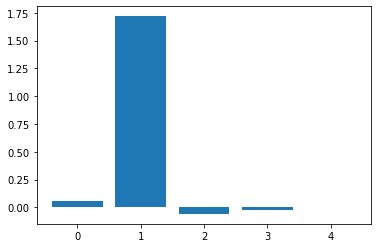

In [206]:
# linear regression feature importance

# our model will be a linear regression model 
model = LinearRegression()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
#SVM model